<a href="https://colab.research.google.com/github/palakharinkhede4/Assignments/blob/main/Boston_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing necesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [ ]:
#importing and printing training dataset
df = pd.read_csv('/train.csv')
print(df)


      ID     crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0      1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1      2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2      4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
3      5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
4      7  0.08829  12.5   7.87     0  0.524  6.012  66.6  5.5605    5  311   
..   ...      ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
328  500  0.17783   0.0   9.69     0  0.585  5.569  73.5  2.3999    6  391   
329  502  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
330  503  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
331  504  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
332  506  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio   black  lstat  medv  
0       15.3  396.90   4.98

In [ ]:
#This will print a concise summary of a DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [ ]:
#make a matplotlib figure
plt.figure(figsize=(10,8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

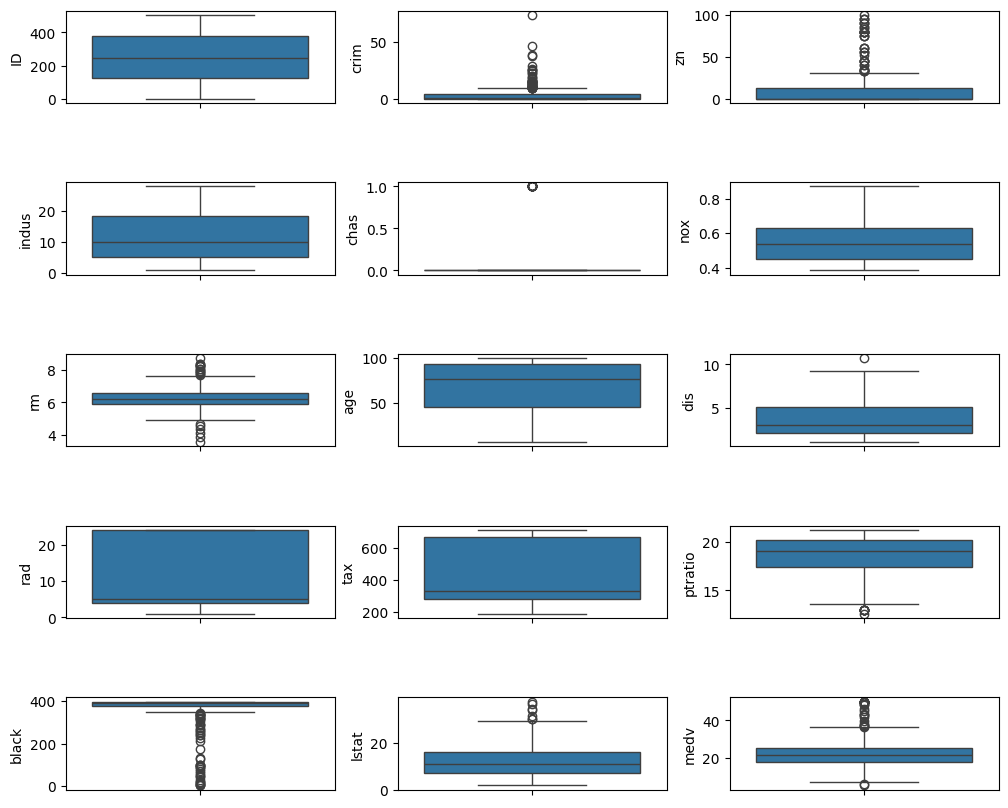

In [ ]:
#create a grid of box plots to visualize the distribution of each column in a pandas DataFrame and this helps in identifying outliers.
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(10,8))
index=0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index+=1
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
#Removing Outliers
df = df[~(df['crim']>=25)] # Use square brackets for boolean indexing
df = df[~((df['rm']>=8.5)|(df['rm']<4))]
df = df[~(df['lstat']>=30)]

In [ ]:
# removing the columns 'ID' and 'chas'
df1 = df.drop(columns=['ID','chas'], axis=1)

In [ ]:
#calculates the number of missing values
df1.isna().sum()


,0
crim,0
zn,0
indus,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0
ptratio,0


In [ ]:
#calculates the number of duplicate rows
df1.duplicated().sum()


0

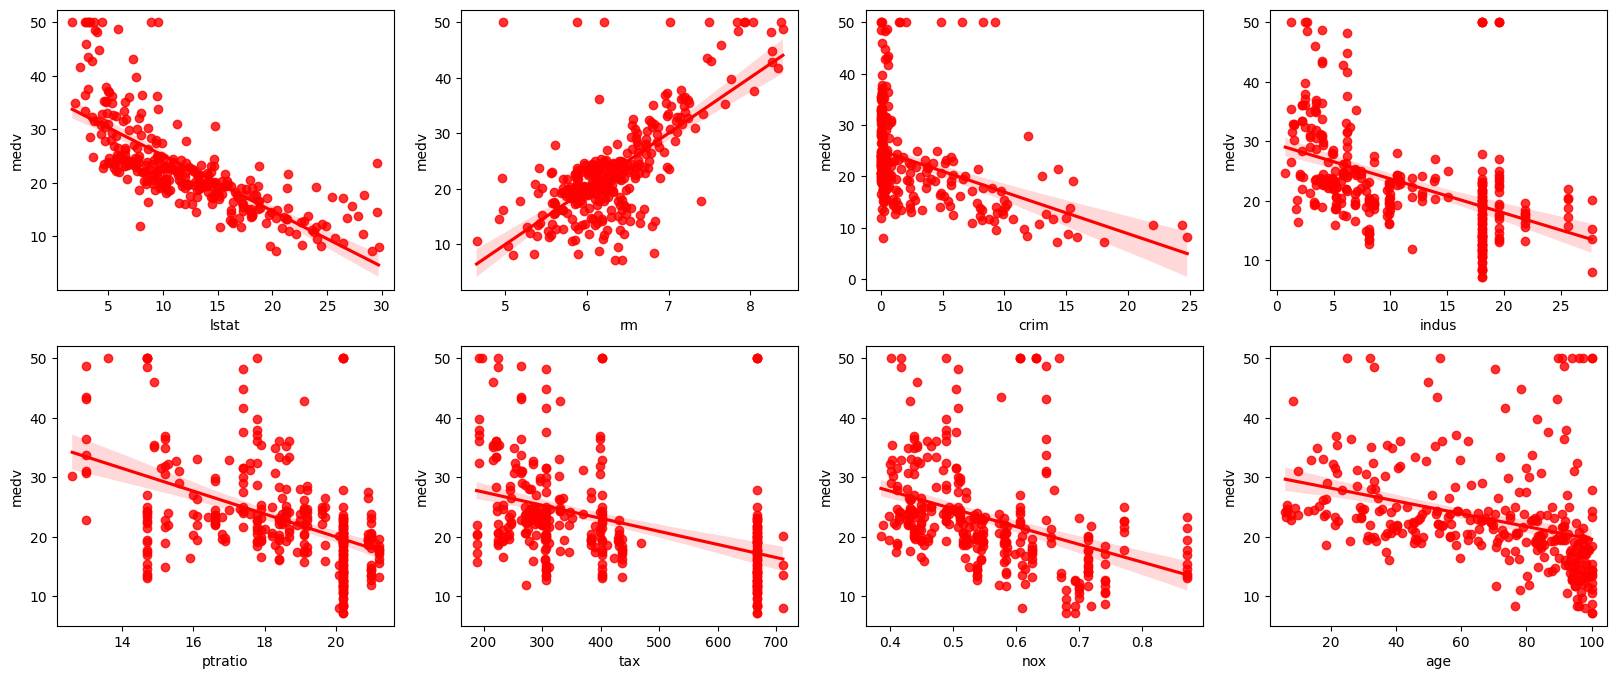

In [ ]:
# Plots for analysing relationship amongst features
fig,axs = plt.subplots(nrows=2, ncols=4, figsize=(20,8))
cols =['lstat','rm','crim','indus', 'ptratio', 'tax', 'nox', 'age']
for col,ax in zip(cols,axs.flatten()):
    sns.regplot(x=df1[col], y=df1['medv'], data=df1, color='red', ax=ax)

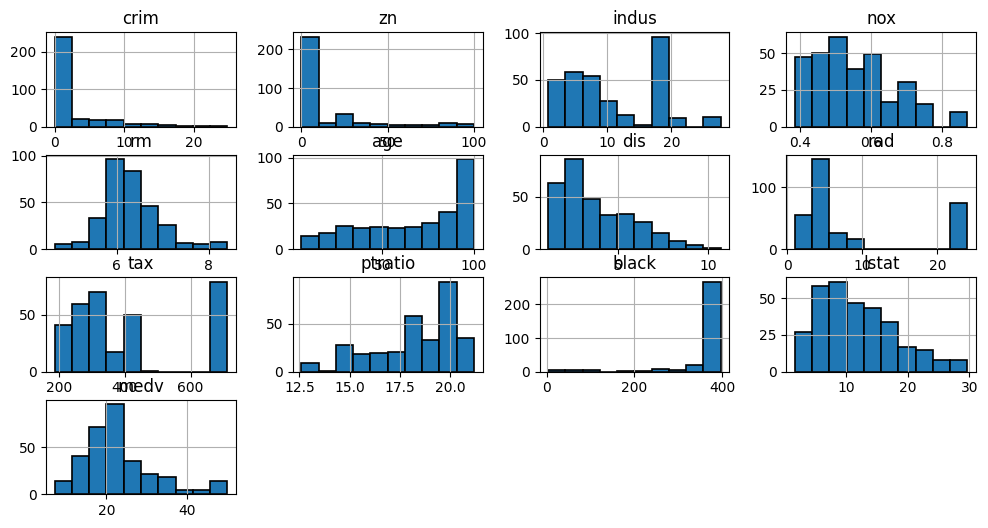

In [ ]:
#create a grid of histograms to visualize the distribution of each column in the DataFrame
df1.hist(edgecolor='black', linewidth=1.2, figsize=(10,10))
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()


In [35]:
#training the linear regression model
X0= df1.iloc[:,1:12].values
Y0= df1.iloc[:,-1].values
LR0= LinearRegression()
LR0.fit(X0,Y0)
print("Intercept :", LR0.intercept_)
print("Coefficients :", LR0.coef_)


Intercept : 22.084795699141246
Coefficients : [ 3.39194209e-02  1.10667959e-01 -1.10513137e+01  5.06857620e+00
 -1.02757256e-02 -1.29581224e+00  2.79102915e-01 -1.30666241e-02
 -8.48765643e-01  1.38567487e-02 -6.35748616e-01]


In [36]:
#Evaluation
Y0_pred= LR0.predict(X0)
RMSE0= np.sqrt(mean_squared_error(Y0,Y0_pred))
print("Root Mean Square Error :", RMSE0)


Root Mean Square Error : 4.5426336922147765


In [37]:
#loading training dataset
train_data = pd.read_csv('/train.csv')
#loading testing dataset
test_data = pd.read_csv('/test.csv')

#separate features and Targets i.e. X and Y
X_train= train_data.drop(columns=['medv'])
Y_train= train_data['medv']

#Prediction using testing dataset
X_test= test_data
test_ids = test_data['ID'] #storing ID column

#Initialize the Linear regression model
model = LinearRegression()
model.fit(X_train, Y_train) #training


#Prediction
y_pred  = model.predict(X_test)

#create a DF with predicted Medv
results= pd.DataFrame({'ID':test_ids, 'Predicted_medv':y_pred})
print(results)




      ID  Predicted_medv
0      3       31.279474
1      6       25.644671
2      8       18.669399
3      9        9.704693
4     10       18.187768
..   ...             ...
168  496       15.675309
169  497       12.071867
170  499       20.149564
171  501       19.043789
172  505       25.099190

[173 rows x 2 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

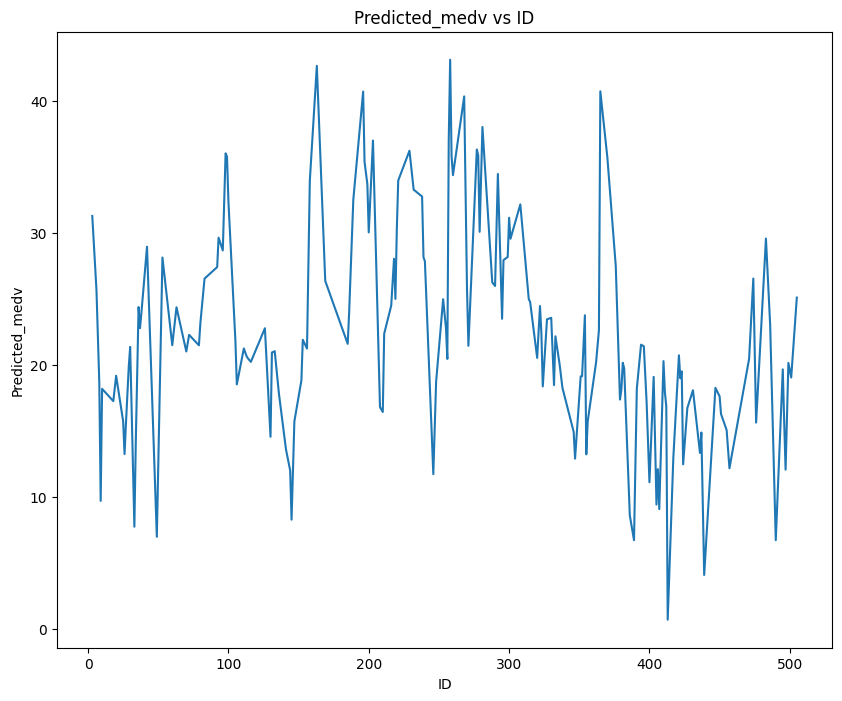

In [40]:
#Plotting predicted Medv with respect to IDs
plt.figure(figsize=(10,8))
plt.plot(results['ID'], results['Predicted_medv'], label= 'Predicted_medv')
plt.title('Predicted_medv vs ID')
plt.xlabel('ID')
plt.ylabel('Predicted_medv')
plt.show